<a href="https://colab.research.google.com/github/Brian13Noble/GIS/blob/main/ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Purpose of the research:
The world has experienced many challenges in the recent past that have contributed to a significant shift in population. Despite being one of the most populated countries in the world, the United States was also hit by the covid-19 pandemic, which led to population changeas across the major states. Additionally, other factors like abortion could also play part in the dynamic shift of the US population. The purpose of the study is to investigate the population changes in the United States between 2021 and 2022        

In [23]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [24]:
!pip install mapclassify
import mapclassify #need for thematic map classification

<Axes: >

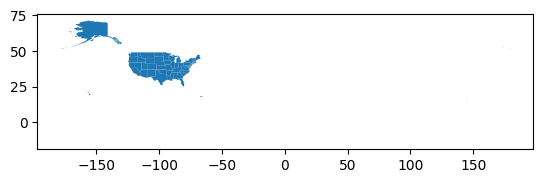

In [25]:
#Mapping the area of interest
! wget -q -O US_States.zip https://docs.google.com/uc?id=1ojvhRXBzkGqRcXeOWC4FubIWMQVTQ6-0&export=download

zip_ref = zipfile.ZipFile('US_States.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
US_States=gpd.read_file('cb_2018_us_state_5m.shp') #load the shapefile with gpd as US_States
#Make the map
US_States.plot()

In [26]:
US_States.dtypes

STATEFP       object
STATENS       object
AFFGEOID      object
GEOID         object
STUSPS        object
NAME          object
LSAD          object
ALAND          int64
AWATER         int64
geometry    geometry
dtype: object

In [27]:
file_path = '/content/NST-EST2022-POP.csv'

if not os.path.exists(file_path):
    !wget -q https://github.com/Brian13Noble/GIS/raw/main/NST-EST2022-POP.csv

us_pop = pd.read_csv(file_path)
us_pop

,State,2021 population,2022 population
0,Alabama,"5,049,846","5,074,296"
1,Alaska,"734,182","733,583"
2,Arizona,"7,264,877","7,359,197"
3,Arkansas,"3,028,122","3,045,637"
4,California,"39,142,991","39,029,342"
5,Colorado,"5,811,297","5,839,926"
6,Connecticut,"3,623,355","3,626,205"
7,Delaware,"1,004,807","1,018,396"
8,District of Columbia,"668,791","671,803"
9,Florida,"21,828,069","22,244,823"


In [28]:
#Loading the excel data
us_pop = '/content/NST-EST2022-POP.csv'
df = pd.read_csv(us_pop)
print(df)
print(df.columns)

#Change the string values to int
df['2021 population'] = df['2021 population'].str.replace(',', '').astype('int')
df['2022 population'] = df['2022 population'].str.replace(',', '').astype('int')
print(df.info())


                   State 2021 population 2022 population
0                Alabama       5,049,846       5,074,296
1                 Alaska         734,182         733,583
2                Arizona       7,264,877       7,359,197
3               Arkansas       3,028,122       3,045,637
4             California      39,142,991      39,029,342
5               Colorado       5,811,297       5,839,926
6            Connecticut       3,623,355       3,626,205
7               Delaware       1,004,807       1,018,396
8   District of Columbia         668,791         671,803
9                Florida      21,828,069      22,244,823
10               Georgia      10,788,029      10,912,876
11                Hawaii       1,447,154       1,440,196
12                 Idaho       1,904,314       1,939,033
13              Illinois      12,686,469      12,582,032
14               Indiana       6,813,532       6,833,037
15                  Iowa       3,197,689       3,200,517
16                Kansas       

In [29]:
#calculate the population change
df['population change'] = (df['2022 population'] - df['2021 population'])  / df['2022 population'] * 100
print(df)

#print(US_States)
#print(US_States.columns)
#print(US_States['NAME'])

                   State  2021 population  2022 population  population change
0                Alabama          5049846          5074296           0.481840
1                 Alaska           734182           733583          -0.081654
2                Arizona          7264877          7359197           1.281662
3               Arkansas          3028122          3045637           0.575085
4             California         39142991         39029342          -0.291189
5               Colorado          5811297          5839926           0.490229
6            Connecticut          3623355          3626205           0.078595
7               Delaware          1004807          1018396           1.334353
8   District of Columbia           668791           671803           0.448346
9                Florida         21828069         22244823           1.873488
10               Georgia         10788029         10912876           1.144034
11                Hawaii          1447154          1440196      

In [30]:
#merging and joining the states to the data frame
US_States = pd.merge(
    left= US_States,
    right=df,
    left_on= 'NAME',
    right_on='State',
    how='outer', indicator= True
        )
#print(US_States.columns)

In [36]:
US_States = US_States.dropna()
US_States = US_States[~US_States['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

In [37]:
US_States[['NAME','State','_merge']]

,NAME,State,_merge
0,Nebraska,Nebraska,both
1,Washington,Washington,both
2,New Mexico,New Mexico,both
3,South Dakota,South Dakota,both
4,Texas,Texas,both
5,California,California,both
6,Kentucky,Kentucky,both
7,Ohio,Ohio,both
8,Alabama,Alabama,both
9,Georgia,Georgia,both


In [33]:
#print(US_States.info())

<Axes: >

Text(0.5, 1.0, 'Population Change in the U.S.A Between 2021 and 2022')

<function matplotlib.pyplot.show(close=None, block=None)>

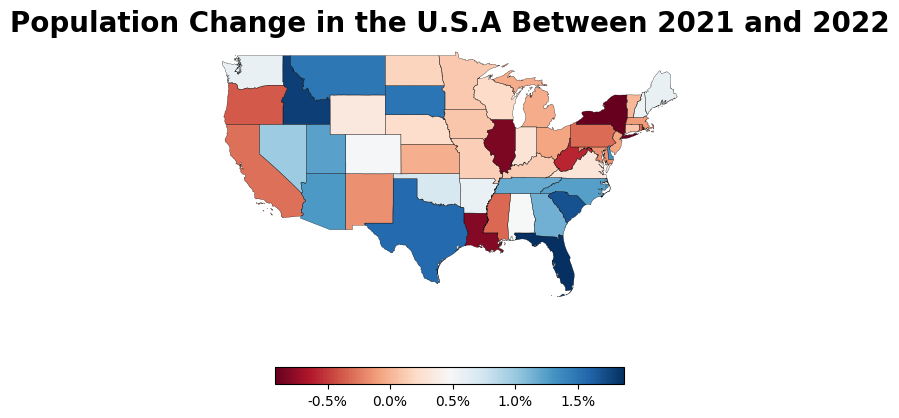

In [38]:
ax = US_States.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(15, 5))
US_States.plot(ax=ax, column='population change', legend=True, cmap='RdBu', legend_kwds={'shrink':0.3,
 'orientation': 'horizontal', 'format': '%.1f%%'})
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)
ax.set_title('Population Change in the U.S.A Between 2021 and 2022', size=20, weight='bold')
plt.show

**Interpretation**

 The map shows that Florida and Idaho were the leading countries that recorded the highest population increase between 2021 and 2022, which was slight above 1.5%. Alternatively, New York, Illinois and Lousiana experienced a significant decline in population in the United States. A further investigation is, therefore, necessary to establish the reasons behind the rise and fall of population among the respective states.

 **Resources:**
https://www.census.gov/data/datasets/time-series/demo/popest/2020s-national-total.html

https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html